In [1]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(0)

# Generate 10,000 rows of data
n_rows = 10000

# OrderID - unique and sequential
order_ids = np.arange(1, n_rows + 1)

# ProductID - simulate 100 unique products
product_ids = np.random.randint(100, 200, n_rows)

# Quantity - random quantity between 1 and 5
quantities = np.random.randint(1, 6, n_rows)

# OrderDate - random dates within a year
order_dates = pd.date_range(start='2023-01-01', periods=n_rows, freq='H').date
order_dates = np.random.choice(order_dates, n_rows)

# CustomerPhone - simulate phone numbers
customer_phones = ['+1' + ''.join(np.random.choice(list('1234567890'), 10)) for _ in range(n_rows)]

# ProductCategory - simulate a few categories
categories = ['Electronics', 'Clothing', 'Home & Kitchen', 'Books', 'Toys', 'Grocery']
product_categories = np.random.choice(categories, n_rows)

sales_records_df = pd.DataFrame({
    'OrderID': order_ids,
    'ProductID': product_ids,
    'Quantity': quantities,
    'OrderDate': order_dates,
    'CustomerPhone': customer_phones,
    'ProductCategory': product_categories
})

sales_records_df.to_csv('sales_records.csv', index=False)


In [2]:
# ProductID - 100 unique IDs
product_ids = np.arange(100, 200)

# ProductName - simulate names
product_names = ['Product_' + str(i) for i in range(100, 200)]

# ProductPrice - random prices
product_prices = np.random.uniform(5.99, 999.99, 100).round(2)

# SupplierID - simulate 10 suppliers
supplier_ids = ['S' + str(i).zfill(2) for i in np.random.randint(1, 11, 100)]

product_info_df = pd.DataFrame({
    'ProductID': product_ids,
    'ProductName': product_names,
    'ProductPrice': product_prices,
    'SupplierID': supplier_ids
})

product_info_df.to_csv('product_info.csv', index=False)


In [39]:
sales_records_df.shape

(10000, 6)

In [40]:
product_info_df.shape

(100, 4)

In [5]:
sales_records_df.head()

,OrderID,ProductID,Quantity,OrderDate,CustomerPhone,ProductCategory
0,1,144,3,2023-09-13,+17363428460,Books
1,2,147,5,2023-04-12,+12118787697,Books
2,3,164,2,2023-01-16,+12125312223,Electronics
3,4,167,3,2024-02-16,+13520091358,Grocery
4,5,167,2,2023-02-22,+10335371036,Electronics


In [6]:
product_info_df.head()

,ProductID,ProductName,ProductPrice,SupplierID
0,100,Product_100,742.67,S10
1,101,Product_101,582.37,S09
2,102,Product_102,526.64,S03
3,103,Product_103,131.84,S03
4,104,Product_104,753.52,S04


In [ ]:
Представим, что у нас есть два файла CSV:

    sales_records.csv - записи о продажах продуктов:
        OrderID: уникальный идентификатор заказа.
        ProductID: идентификатор продукта.
        Quantity: количество проданных единиц.
        OrderDate: дата заказа.
        CustomerID: идентификатор покупателя.

    product_info.csv - информация о продуктах:
        ProductID: идентификатор продукта.
        ProductName: название продукта.
        ProductPrice: цена продукта за единицу.
        SupplierID: идентификатор поставщика.

Задачи для набора данных по продажам

    Объединение таблиц:
    Объедините sales_records.csv и product_info.csv по ProductID.

    Изменение типа столбцов:
        Преобразуйте OrderDate в тип pd.Timestamp.
        Преобразуйте ProductPrice и Quantity в тип float.

    Добавьте новые столбцы на основе других столбцов:
        Рассчитайте общую стоимость продажи для каждого заказа и добавьте её как новый столбец TotalSale.

    Фильтрация:
        Оставьте только те продажи, которые превышают "$100" в TotalSale.

    Сортировка:
        Отсортируйте отфильтрованный датафрейм по TotalSale в порядке убывания.

    Агрегация:
        Подсчитайте общее количество продаж (в единицах) для каждого ProductName.

    Анализ динамики продаж:
        Определите месяц с наивысшим общим TotalSale и подсчитайте общее количество продаж в этом месяце.


In [ ]:
product_info_df, sales_records_df

In [44]:
def camel_to_snake(name):
    name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()

In [47]:
import re

In [48]:
camel_to_snake('MyVariable')

'my_variable'

In [54]:
new_columns = [camel_to_snake(i) for i in list(product_info_df.columns)]

In [60]:
product_info_df = pd.DataFrame(product_info_df.values, columns=new_columns)

In [62]:
sales_records_df

,OrderID,ProductID,Quantity,OrderDate,CustomerPhone,ProductCategory
0,1,144,3,2023-09-13,+17363428460,Books
1,2,147,5,2023-04-12,+12118787697,Books
2,3,164,2,2023-01-16,+12125312223,Electronics
3,4,167,3,2024-02-16,+13520091358,Grocery
4,5,167,2,2023-02-22,+10335371036,Electronics
...,...,...,...,...,...,...
9995,9996,107,2,2023-02-10,+14047533827,Toys
9996,9997,129,1,2023-09-22,+16064787706,Electronics
9997,9998,139,1,2023-01-08,+18155151173,Books
9998,9999,172,1,2023-12-10,+10098208387,Clothing


In [64]:
merged_df = pd.merge(sales_records_df, product_info_df, how='inner', left_on='ProductID', right_on='product_id')

In [65]:
merged_df.head()

,OrderID,ProductID,Quantity,OrderDate,CustomerPhone,ProductCategory,product_id,product_name,product_price,supplier_id
0,1,144,3,2023-09-13,+17363428460,Books,144,Product_144,580.66,S09
1,217,144,2,2023-05-18,+18339016602,Books,144,Product_144,580.66,S09
2,270,144,4,2023-05-16,+18698997842,Grocery,144,Product_144,580.66,S09
3,306,144,4,2023-10-02,+14929732498,Books,144,Product_144,580.66,S09
4,420,144,5,2024-01-21,+14447721130,Electronics,144,Product_144,580.66,S09


In [66]:
merged_df.dtypes

OrderID             int64
ProductID          object
Quantity            int64
OrderDate          object
CustomerPhone      object
ProductCategory    object
product_id         object
product_name       object
product_price      object
supplier_id        object
dtype: object

In [69]:
pd.Timestamp

pandas._libs.tslibs.timestamps.Timestamp

In [71]:
merged_df['OrderDate'] = pd.to_datetime(merged_df['OrderDate'])

In [77]:
merged_df['Quantity'] = merged_df['Quantity'].astype(float)


In [72]:
import numpy as np

In [73]:
np.float64

numpy.float64

In [76]:
merged_df['product_price'] = merged_df['product_price'].astype(float)

In [78]:
merged_df.dtypes

OrderID                     int64
ProductID                  object
Quantity                  float64
OrderDate          datetime64[ns]
CustomerPhone              object
ProductCategory            object
product_id                 object
product_name               object
product_price             float64
supplier_id                object
dtype: object

In [79]:
merged_df.head(2)

,OrderID,ProductID,Quantity,OrderDate,CustomerPhone,ProductCategory,product_id,product_name,product_price,supplier_id
0,1,144,3.0,2023-09-13,+17363428460,Books,144,Product_144,580.66,S09
1,217,144,2.0,2023-05-18,+18339016602,Books,144,Product_144,580.66,S09


In [81]:
merged_df['total_price'] = merged_df['Quantity'] * merged_df['product_price']

In [82]:
merged_df.sort_values(by='total_price', ascending=False, inplace=True)

In [83]:
merged_df.head(5)

,OrderID,ProductID,Quantity,OrderDate,CustomerPhone,ProductCategory,product_id,product_name,product_price,supplier_id,total_price
4283,9859,153,5.0,2023-06-17,+19683366121,Books,153,Product_153,989.27,S03,4946.35
4265,8115,153,5.0,2023-08-12,+13991668251,Home & Kitchen,153,Product_153,989.27,S03,4946.35
4266,8136,153,5.0,2023-03-20,+16572017794,Grocery,153,Product_153,989.27,S03,4946.35
4217,2218,153,5.0,2023-05-17,+15677426358,Grocery,153,Product_153,989.27,S03,4946.35
4256,7336,153,5.0,2024-01-04,+19320130220,Clothing,153,Product_153,989.27,S03,4946.35


In [89]:
merged_df.groupby(by='product_id')['Quantity'].sum()

product_id
100    335.0
101    282.0
102    261.0
103    354.0
104    305.0
       ...  
195    298.0
196    265.0
197    339.0
198    252.0
199    307.0
Name: Quantity, Length: 100, dtype: float64

In [92]:
merged_df.OrderDate.dt.month
merged_df.OrderDate.dt.year

4283     6
4265     8
4266     3
4217     5
4256     1
        ..
9779    11
9772     3
9770     1
9769     5
9820    11
Name: OrderDate, Length: 10000, dtype: int32

In [98]:
merged_df['year_month'] = merged_df.OrderDate.astype(str).str[:7]

In [99]:
merged_df.head(5)

,OrderID,ProductID,Quantity,OrderDate,CustomerPhone,ProductCategory,product_id,product_name,product_price,supplier_id,total_price,year_month
4283,9859,153,5.0,2023-06-17,+19683366121,Books,153,Product_153,989.27,S03,4946.35,2023-06
4265,8115,153,5.0,2023-08-12,+13991668251,Home & Kitchen,153,Product_153,989.27,S03,4946.35,2023-08
4266,8136,153,5.0,2023-03-20,+16572017794,Grocery,153,Product_153,989.27,S03,4946.35,2023-03
4217,2218,153,5.0,2023-05-17,+15677426358,Grocery,153,Product_153,989.27,S03,4946.35,2023-05
4256,7336,153,5.0,2024-01-04,+19320130220,Clothing,153,Product_153,989.27,S03,4946.35,2024-01


In [101]:
revenue_by_month = merged_df.groupby(by='year_month')['total_price'].sum()

In [103]:
revenue_by_month

year_month
2023-01    1104005.95
2023-02     998188.34
2023-03    1193339.65
2023-04    1102042.29
2023-05    1040401.36
2023-06    1114722.68
2023-07    1190637.20
2023-08    1183954.44
2023-09    1058897.69
2023-10    1081047.70
2023-11    1140691.09
2023-12    1059195.55
2024-01    1194418.07
2024-02     752990.00
Name: total_price, dtype: float64

In [104]:
# Series.idxmax()
highest_sales_month = revenue_by_month.idxmax()
highest_sales_value = revenue_by_month.max()


# Вывод результатов
print(f"Месяц с наивысшим общим объемом продаж: {highest_sales_month}, Общая сумма продаж: {highest_sales_value}")


Месяц с наивысшим общим объемом продаж: 2024-01, Общая сумма продаж: 1194418.07


In [19]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


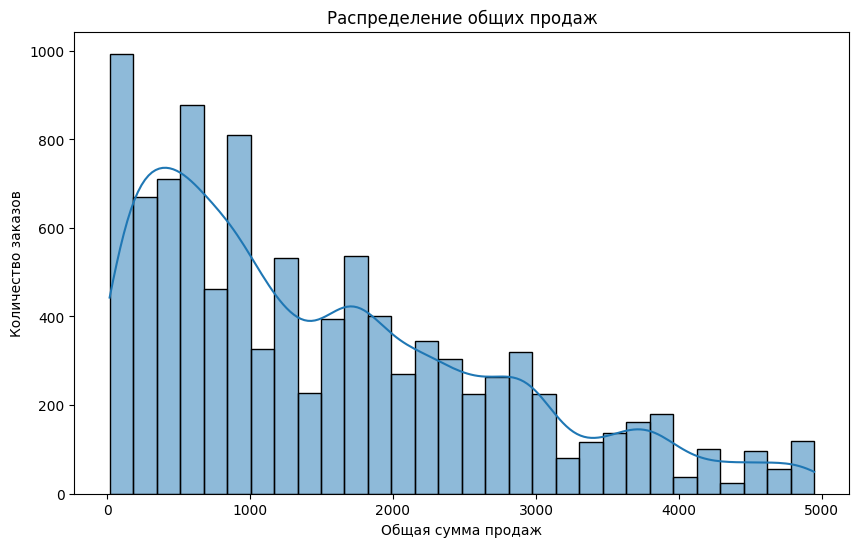

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма общих продаж
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['TotalSale'], bins=30, kde=True)
plt.title('Распределение общих продаж')
plt.xlabel('Общая сумма продаж')
plt.ylabel('Количество заказов')
plt.show()


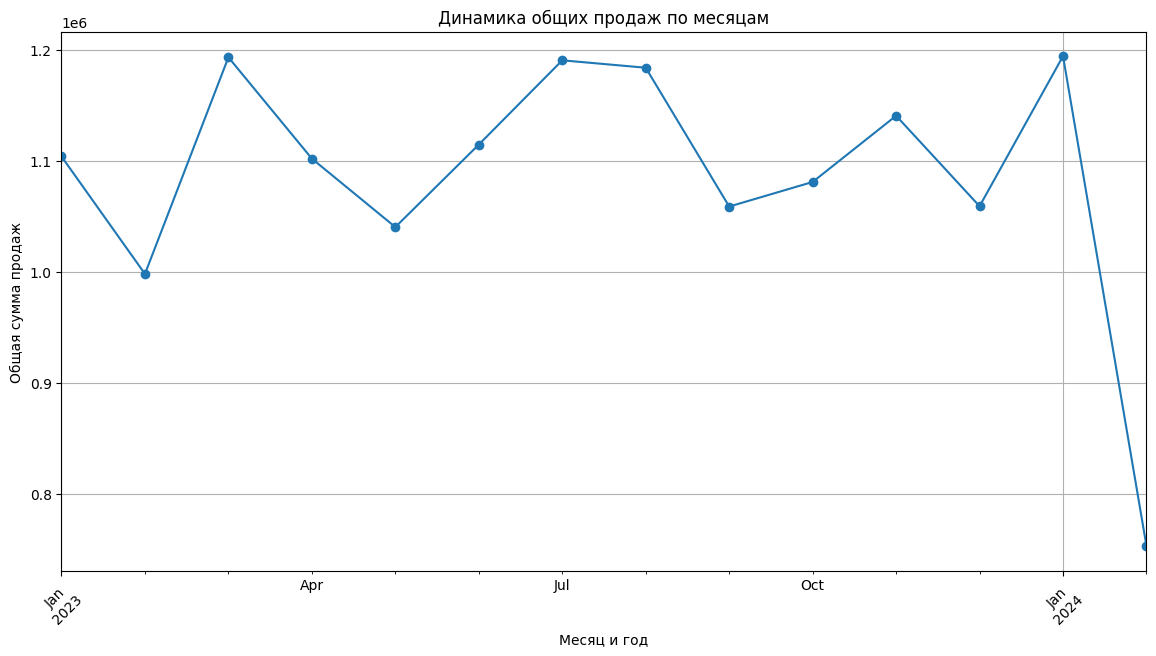

In [21]:
plt.figure(figsize=(14, 7))
sales_by_month.plot(kind='line', marker='o')
plt.title('Динамика общих продаж по месяцам')
plt.xlabel('Месяц и год')
plt.ylabel('Общая сумма продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


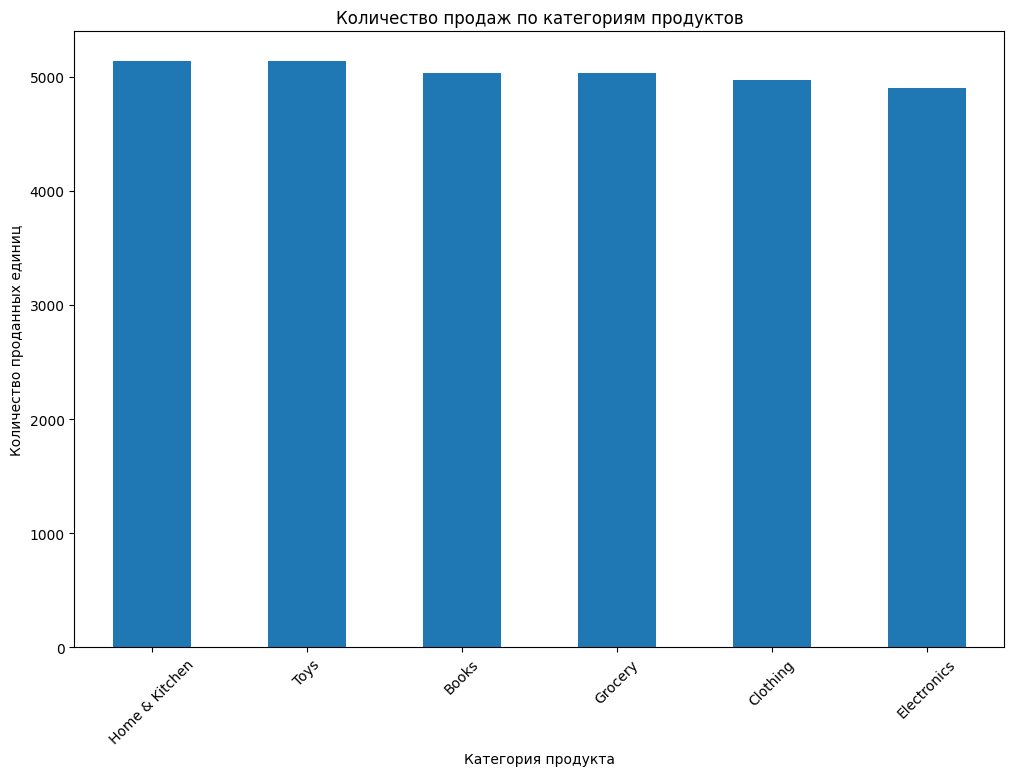

In [22]:
# Агрегация данных по категориям
sales_by_category = merged_df.groupby('ProductCategory')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sales_by_category.plot(kind='bar')
plt.title('Количество продаж по категориям продуктов')
plt.xlabel('Категория продукта')
plt.ylabel('Количество проданных единиц')
plt.xticks(rotation=45)
plt.show()
